In [ ]:
import keras
import shutil
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd
from keras.src.saving.saving_lib import save_weights_only
old_acc = 0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(ds_train, ds_test), ds_info = tfds.load(
    'kmnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteYSOGFK/kmnist-train.tfrecord*...:   0%|          | …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/3.0.1.incompleteYSOGFK/kmnist-test.tfrecord*...:   0%|          | 0…

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
checkpoint_filepath = "/tmp/checkpoint-4"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

In [ ]:
#df = pd.DataFrame(columns=['Run', 'Acc', 'Acc_test','learning_rate','hidden_layer_size','model_depth','batch_normalization','rotation_augment','gaussian_noise'])
df_3 = pd.DataFrame(columns=['Run', 'Acc', 'Acc_test','learning_rate','hidden_layer_size','model_depth','batch_normalization','rotation_augment','gaussian_noise'])

In [ ]:
#df.to_csv('df.csv')
#!cp df.csv /content/drive/MyDrive/df.csv


In [ ]:
#df

,Run,Acc,Acc_test,learning_rate,hidden_layer_size,model_depth,batch_normalization,rotation_augment,gaussian_noise


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
df_2 = pd.read_csv('/content/drive/MyDrive/df.csv')
df_2.drop(columns=['Unnamed: 0'], inplace=True)
df_3 = pd.read_csv('/content/drive/MyDrive/df_3.csv')
df_3.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_3

,Run,Acc,Acc_test,learning_rate,hidden_layer_size,model_depth,batch_normalization,rotation_augment,gaussian_noise
0,1,0.971700,0.9404,0.007,1024,4,True,0.0000,0.000
1,2,0.959200,0.9506,0.003,2048,3,True,0.0050,0.015
2,3,0.976617,0.9458,0.004,2048,4,True,0.0000,0.000
3,4,0.965033,0.9419,0.008,512,4,True,0.0000,0.060
4,1,0.412233,0.4792,0.008,512,4,False,0.0050,0.015
5,2,0.969233,0.9396,0.009,1024,4,True,0.0000,0.000
6,3,0.946233,0.9439,0.006,512,3,True,0.0050,0.000
7,4,0.967983,0.9391,0.009,1024,4,True,0.0000,0.030
8,1,0.968600,0.9436,0.005,2048,3,True,0.0000,0.060
9,2,0.972900,0.9428,0.005,1024,4,True,0.0000,0.030


In [ ]:
df_2

,Run,Acc,Acc_test,learning_rate,hidden_layer_size,model_depth,batch_normalization,rotation_augment,gaussian_noise
0,1,0.919100,0.8971,0.005,128,1,True,0.000,0.015
1,2,0.953367,0.9294,0.003,128,3,True,0.000,0.000
2,3,0.913817,0.8922,0.006,128,1,True,0.000,0.060
3,4,0.934767,0.9140,0.004,128,2,True,0.000,0.060
4,5,0.905917,0.9326,0.004,512,3,True,0.010,0.000
5,6,0.952017,0.9280,0.005,256,2,True,0.000,0.000
6,7,0.973150,0.9428,0.002,512,4,True,0.000,0.015
7,8,0.880800,0.9095,0.004,128,3,True,0.010,0.060
8,9,0.943100,0.9201,0.006,512,1,True,0.000,0.000
9,10,0.940283,0.9367,0.009,1024,3,True,0.005,0.000


In [ ]:
df_2.groupby(['model_depth'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)

<ipython-input-12-d0e33387b1e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2.groupby(['model_depth'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)


,model_depth,Acc,Acc_test
3,4,0.973150,0.9428
2,3,0.964367,0.9415
1,2,0.952017,0.9369
0,1,0.943100,0.9270


In [ ]:
df_2.groupby(['learning_rate'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)

<ipython-input-13-7d83831a329d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2.groupby(['learning_rate'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)


,learning_rate,Acc,Acc_test
1,0.002,0.973150,0.9428
8,0.009,0.964367,0.9415
4,0.005,0.970850,0.9390
2,0.003,0.953367,0.9369
0,0.001,0.962767,0.9366
3,0.004,0.934767,0.9326
7,0.008,0.962050,0.9290
9,0.010,0.945017,0.9255
5,0.006,0.943100,0.9201
6,0.007,0.939633,0.9138


In [ ]:
df_2.groupby(['hidden_layer_size','model_depth'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)

<ipython-input-16-a395df27e1ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2.groupby(['hidden_layer_size','model_depth'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)


,hidden_layer_size,model_depth,Acc,Acc_test
11,512,4,0.973150,0.9428
14,1024,3,0.964367,0.9415
9,512,2,0.945083,0.9369
6,256,3,0.962767,0.9366
3,128,4,0.954733,0.9361
7,256,4,0.954750,0.9347
10,512,3,0.905917,0.9326
2,128,3,0.953367,0.9307
15,1024,4,0.962050,0.9290
5,256,2,0.952017,0.9280


In [ ]:
df_2.groupby(['batch_normalization','rotation_augment','gaussian_noise'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)

<ipython-input-15-bd9598f99479>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2.groupby(['batch_normalization','rotation_augment','gaussian_noise'])['Acc', 'Acc_test'].max().reset_index().sort_values(by=['Acc_test'], ascending=False)


,batch_normalization,rotation_augment,gaussian_noise,Acc,Acc_test
8,True,0.000,0.015,0.973150,0.9428
9,True,0.000,0.030,0.964367,0.9415
10,True,0.000,0.060,0.970850,0.9390
11,True,0.005,0.000,0.945083,0.9369
13,True,0.005,0.060,0.940250,0.9361
7,True,0.000,0.000,0.959217,0.9348
14,True,0.010,0.000,0.911967,0.9347
2,False,0.000,0.030,0.954750,0.9305
6,False,0.005,0.030,0.927233,0.9204
17,True,0.010,0.060,0.885950,0.9148


In [ ]:
from keras.src.saving.saving_lib import save_weights_only

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  tf.keras.layers.RandomRotation(.005),
  tf.keras.layers.Flatten(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(256, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.006),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),'accuracy'],
)

hist = model.fit(
    ds_train,
    epochs=2,
    callbacks=[checkpoint_callback],
    validation_data=ds_test
)

model.load_weights(checkpoint_filepath)

score = model.evaluate(ds_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Epoch 1/2
469/469 [==============================] - 20s 13ms/step - loss: 0.6728 - sparse_categorical_accuracy: 0.7871 - accuracy: 0.7871 - val_loss: 0.5945 - val_sparse_categorical_accuracy: 0.8172 - val_accuracy: 0.8172
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.4643 - sparse_categorical_accuracy: 0.8559 - accuracy: 0.8559 - val_loss: 0.5489 - val_sparse_categorical_accuracy: 0.8375 - val_accuracy: 0.8375
Test loss: 0.5489092469215393
Test accuracy: 0.8374999761581421


In [ ]:
#This was round 1
import itertools
learning_rate = [.001, .002, .003, .004, .005, .006, .007, .008, .009, .01]
hidden_layer_size = [128, 256, 512, 1024]
model_depth = [1, 2, 3, 4]
batch_normalization = [True, True, True, True, False]
rotation_augment = [0 ,0, 0, .005, .01, .05]
gaussian_noise = [0, 0, 0, .015, .03, .06]

hyp = itertools.product(learning_rate, hidden_layer_size, model_depth, batch_normalization, rotation_augment, gaussian_noise)

my_hyp = []
for i in hyp:
  my_hyp.append(i)

print(my_hyp)

[(0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0.015), (0.001, 128, 1, True, 0, 0.03), (0.001, 128, 1, True, 0, 0.06), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0.015), (0.001, 128, 1, True, 0, 0.03), (0.001, 128, 1, True, 0, 0.06), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0), (0.001, 128, 1, True, 0, 0.015), (0.001, 128, 1, True, 0, 0.03), (0.001, 128, 1, True, 0, 0.06), (0.001, 128, 1, True, 0.005, 0), (0.001, 128, 1, True, 0.005, 0), (0.001, 128, 1, True, 0.005, 0), (0.001, 128, 1, True, 0.005, 0.015), (0.001, 128, 1, True, 0.005, 0.03), (0.001, 128, 1, True, 0.005, 0.06), (0.001, 128, 1, True, 0.01, 0), (0.001, 128, 1, True, 0.01, 0), (0.001, 128, 1, True, 0.01, 0), (0.001, 128, 1, True, 0.01, 0.015), (0.001, 128, 1, True, 0.01, 0.03), (0.001, 128, 1, True, 0.01, 0.06), (0.001, 128, 1, True, 0.05, 0), (0.00

In [ ]:
#df_2 best re-run
import itertools
learning_rate = [.002]
hidden_layer_size = [512]
model_depth = [4]
batch_normalization = [True, True, True, True]
rotation_augment = [0 ,0, 0, ]
gaussian_noise = [.015]

hyp = itertools.product(learning_rate, hidden_layer_size, model_depth, batch_normalization, rotation_augment, gaussian_noise)

my_hyp = []
for i in hyp:
  my_hyp.append(i)

print(my_hyp)

[(0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015), (0.002, 512, 4, True, 0, 0.015)]


In [ ]:
#This was round 2 - saved top df_3
import itertools
learning_rate = [.001, .002, .003, .004, .005, .006, .007, .008, .009]
hidden_layer_size = [512, 1024, 2048]
model_depth = [3, 4]
batch_normalization = [True, True, True, True, False]
rotation_augment = [0 ,0, 0, .005]
gaussian_noise = [0, .015, .03, .06]

hyp = itertools.product(learning_rate, hidden_layer_size, model_depth, batch_normalization, rotation_augment, gaussian_noise)

my_hyp = []
for i in hyp:
  my_hyp.append(i)

print(my_hyp)

[(0.001, 512, 3, True, 0, 0), (0.001, 512, 3, True, 0, 0.015), (0.001, 512, 3, True, 0, 0.03), (0.001, 512, 3, True, 0, 0.06), (0.001, 512, 3, True, 0, 0), (0.001, 512, 3, True, 0, 0.015), (0.001, 512, 3, True, 0, 0.03), (0.001, 512, 3, True, 0, 0.06), (0.001, 512, 3, True, 0, 0), (0.001, 512, 3, True, 0, 0.015), (0.001, 512, 3, True, 0, 0.03), (0.001, 512, 3, True, 0, 0.06), (0.001, 512, 3, True, 0.005, 0), (0.001, 512, 3, True, 0.005, 0.015), (0.001, 512, 3, True, 0.005, 0.03), (0.001, 512, 3, True, 0.005, 0.06), (0.001, 512, 3, True, 0, 0), (0.001, 512, 3, True, 0, 0.015), (0.001, 512, 3, True, 0, 0.03), (0.001, 512, 3, True, 0, 0.06), (0.001, 512, 3, True, 0, 0), (0.001, 512, 3, True, 0, 0.015), (0.001, 512, 3, True, 0, 0.03), (0.001, 512, 3, True, 0, 0.06), (0.001, 512, 3, True, 0, 0), (0.001, 512, 3, True, 0, 0.015), (0.001, 512, 3, True, 0, 0.03), (0.001, 512, 3, True, 0, 0.06), (0.001, 512, 3, True, 0.005, 0), (0.001, 512, 3, True, 0.005, 0.015), (0.001, 512, 3, True, 0.005, 0.

In [ ]:
#This was round 3 - saved to df_3
import itertools
learning_rate = [.003, .004, .005, .006, .007, .008, .009]
hidden_layer_size = [512, 1024, 2048]
model_depth = [3, 4, 5]
batch_normalization = [True, True, True, True, False]
rotation_augment = [.0025, .005, .0055]
gaussian_noise = [.015, .03, .06]

hyp = itertools.product(learning_rate, hidden_layer_size, model_depth, batch_normalization, rotation_augment, gaussian_noise)

my_hyp = []
for i in hyp:
  my_hyp.append(i)

print(my_hyp)

[(0.003, 512, 3, True, 0.0025, 0.015), (0.003, 512, 3, True, 0.0025, 0.03), (0.003, 512, 3, True, 0.0025, 0.06), (0.003, 512, 3, True, 0.005, 0.015), (0.003, 512, 3, True, 0.005, 0.03), (0.003, 512, 3, True, 0.005, 0.06), (0.003, 512, 3, True, 0.0055, 0.015), (0.003, 512, 3, True, 0.0055, 0.03), (0.003, 512, 3, True, 0.0055, 0.06), (0.003, 512, 3, True, 0.0025, 0.015), (0.003, 512, 3, True, 0.0025, 0.03), (0.003, 512, 3, True, 0.0025, 0.06), (0.003, 512, 3, True, 0.005, 0.015), (0.003, 512, 3, True, 0.005, 0.03), (0.003, 512, 3, True, 0.005, 0.06), (0.003, 512, 3, True, 0.0055, 0.015), (0.003, 512, 3, True, 0.0055, 0.03), (0.003, 512, 3, True, 0.0055, 0.06), (0.003, 512, 3, True, 0.0025, 0.015), (0.003, 512, 3, True, 0.0025, 0.03), (0.003, 512, 3, True, 0.0025, 0.06), (0.003, 512, 3, True, 0.005, 0.015), (0.003, 512, 3, True, 0.005, 0.03), (0.003, 512, 3, True, 0.005, 0.06), (0.003, 512, 3, True, 0.0055, 0.015), (0.003, 512, 3, True, 0.0055, 0.03), (0.003, 512, 3, True, 0.0055, 0.06), 

In [ ]:
#phase_3/df3 best run-rerun
import itertools
learning_rate = [.003]
hidden_layer_size = [2048]
model_depth = [3]
batch_normalization = [True, True, True, True]
rotation_augment = [.005]
gaussian_noise = [.015]

hyp = itertools.product(learning_rate, hidden_layer_size, model_depth, batch_normalization, rotation_augment, gaussian_noise)

my_hyp = []
for i in hyp:
  my_hyp.append(i)

print(my_hyp)

[(0.003, 2048, 3, True, 0.005, 0.015), (0.003, 2048, 3, True, 0.005, 0.015), (0.003, 2048, 3, True, 0.005, 0.015), (0.003, 2048, 3, True, 0.005, 0.015)]


In [ ]:
run = 0
for i in range(1):
  tf.keras.backend.clear_session()
  run += 1
  curr_hyp = my_hyp[np.random.randint(len(my_hyp))]
  lr, hls, md, bn, ra, gn = curr_hyp

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.InputLayer(input_shape=(28, 28)))
  model.add(tf.keras.layers.RandomRotation(ra))
  model.add(tf.keras.layers.GaussianNoise(gn))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dropout(.5))
  for j in range(md):
    model.add(tf.keras.layers.Dense((hls * 2** (md - j - 1)), activation='relu'))
    if bn:
      model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(.5))
  model.add(tf.keras.layers.Dense(10))


  model.compile(
    optimizer=tf.keras.optimizers.Adam(lr),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),'accuracy'],
  )
  print(model.summary())
  hist = model.fit(
      ds_train,
      epochs=60,
      callbacks=[checkpoint_callback],
      validation_data=ds_test,
  )

  print(run)
  max_acc = df_3['Acc_test'].max()
  curr_acc = max(hist.history['val_accuracy'])
  #if curr_acc >= max_acc:
    #model.load_weights(checkpoint_filepath)
    #model.save('/content/drive/MyDrive/Best_Model.keras')
  #new_row = pd.Series({'Run': run, 'Acc': max(hist.history['accuracy']), 'Acc_test':  max(hist.history['val_accuracy']),'learning_rate' : lr,'hidden_layer_size': hls,'model_depth': md,'batch_normalization' : bn,'rotation_augment' : ra,'gaussian_noise' : gn})
  #df_3 = pd.concat([df_3,new_row.to_frame().T],ignore_index=True)
  #df_3.to_csv('df_3.csv')
  #!cp df_3.csv /content/drive/MyDrive/df_3.csv


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRot  (None, 28, 28)            0         
 ation)                                                          
                                                                 
 gaussian_noise (GaussianNo  (None, 28, 28)            0         
 ise)                                                            
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 8192)              6430720   
                                                                 
 batch_normalization (Batch  (None, 8192)              3

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
score = model.evaluate(ds_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.19376510381698608
Test accuracy: 0.9557999968528748


In [ ]:
score = model.evaluate(ds_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.005428055766969919
Train accuracy: 0.998533308506012


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(ds_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in ds_test], axis=0)
cm = confusion_matrix(y_true, y_pred)
print(cm)

79/79 [==============================] - 0s 3ms/step
[[964   2   2   0  12   2   0   3   8   7]
 [  1 932  15   0   7   1  23   1  17   3]
 [  9   2 909  43   3   7   8   2   9   8]
 [  0   0  12 979   0   4   1   2   1   1]
 [ 17   8   2   2 943   4   5   4  12   3]
 [  2   6  20   4   3 952   8   1   3   1]
 [  4   3  13   1   4   2 971   0   1   1]
 [  3   4   4   0   3   0   6 969   5   6]
 [  0   6   2   2   5   2   1   1 981   0]
 [  9   3   5   0   3   0   3   5  14 958]]


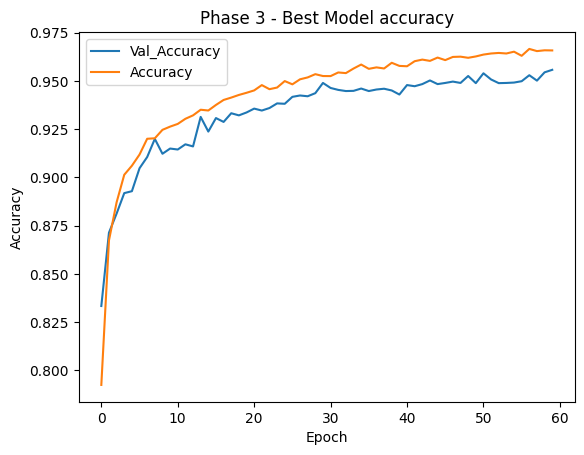

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])
plt.title('Phase 3 - Best Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Val_Accuracy', 'Accuracy'], loc='upper left')
plt.show()


In [ ]:
#Phase 1 manual exploration
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(512, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(256, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(128, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.006),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(),'accuracy'],
)

model.fit(
    ds_train,
    epochs=30,
    callbacks=[checkpoint_callback],
    validation_data=ds_test,
)

Epoch 1/30
469/469 [==============================] - 12s 22ms/step - loss: 0.6144 - sparse_categorical_accuracy: 0.8077 - accuracy: 0.8077 - val_loss: 0.5961 - val_sparse_categorical_accuracy: 0.8167 - val_accuracy: 0.8167
Epoch 2/30
469/469 [==============================] - 11s 23ms/step - loss: 0.3962 - sparse_categorical_accuracy: 0.8778 - accuracy: 0.8778 - val_loss: 0.4739 - val_sparse_categorical_accuracy: 0.8598 - val_accuracy: 0.8598
Epoch 3/30
469/469 [==============================] - 11s 23ms/step - loss: 0.3342 - sparse_categorical_accuracy: 0.8967 - accuracy: 0.8967 - val_loss: 0.4692 - val_sparse_categorical_accuracy: 0.8591 - val_accuracy: 0.8591
Epoch 4/30
469/469 [==============================] - 9s 20ms/step - loss: 0.3025 - sparse_categorical_accuracy: 0.9064 - accuracy: 0.9064 - val_loss: 0.4095 - val_sparse_categorical_accuracy: 0.8742 - val_accuracy: 0.8742
Epoch 5/30
469/469 [==============================] - 10s 22ms/step - loss: 0.2768 - sparse_categorical_a

In [ ]:
model.load_weights(checkpoint_filepath)


In [ ]:
score = model.evaluate(ds_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.26792386174201965
Test accuracy: 0.929099977016449


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dropout_8 (Dropout)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                      

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model.predict(ds_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in ds_test], axis=0)
cm = confusion_matrix(y_true, y_pred)
print(cm)


79/79 [==============================] - 1s 14ms/step
[[952   1   1   0  13   4   2  17  10   0]
 [  2 900  11   0  20   0  36   6  17   8]
 [ 11   7 862  67  12   4  10   7  10  10]
 [  3   1   9 977   1   0   1   3   1   4]
 [ 22   6   1   4 928   1   7   8  17   6]
 [  2   8  42   7  10 902  16   1   4   8]
 [  4   2   9   4  10   1 964   2   1   3]
 [  8   3   3   0  15   0   8 946  11   6]
 [  6  10   7  15   3   2   8   3 943   3]
 [  7   4  11   7  14   0  15   9  16 917]]


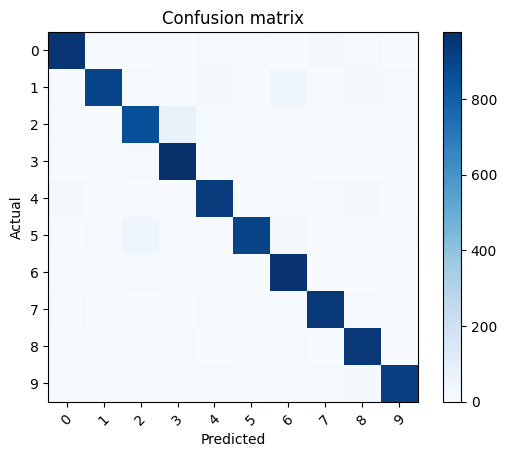

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [0,1,2,3,4,5,6,7,8,9], rotation=45)
plt.yticks(tick_marks, [0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/model_1.keras')
model.save_weights('/content/drive/My Drive/weights_1.h5')


In [ ]:
!cp /content/drive/MyDrive/Best_Model.keras /content/


In [ ]:
model2 = tf.keras.models.load_model('Best_Model.keras')
model2.load_weights('/content/drive/My Drive/Best_Model.keras')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
y_pred = model2.predict(ds_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = np.concatenate([y for x, y in ds_test], axis=0)
cm = confusion_matrix(y_true, y_pred)
print(cm)


79/79 [==============================] - 0s 3ms/step
[[975   2   2   0   7   1   0   2   9   2]
 [  4 916   9   0   9   3  28   4  18   9]
 [ 11   4 893  35   6   9  12   5  15  10]
 [  1   1  10 975   0   7   0   1   2   3]
 [ 19   7   0   2 931   4   7   3  18   9]
 [  1   4  15   5   2 954   9   2   5   3]
 [  4   5   8   2   5   1 971   1   2   1]
 [  8   3   4   0   6   0   8 954   8   9]
 [  4   5   1   4   2   1   3   1 979   0]
 [ 11   5   3   2   5   0   6   1   9 958]]
